In [2]:
%matplotlib widget
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as const

import lightkurve as lk

import sys
sys.path.append('/Users/james/Dropbox/research_projects/FFD/')
from FFD import FFD

from scipy.optimize import curve_fit

/Users/james/anaconda3/lib/python3.11/site-packages/lightkurve/config/__init__.py:119: UserWarning: The default Lightkurve cache directory, used by download(), etc., has been moved to /Users/james/.lightkurve/cache. Please move all the files in the legacy directory /Users/james/.lightkurve-cache to the new location and remove the legacy directory. Refer to https://docs.lightkurve.org/reference/config.html#default-cache-directory-migration for more information.
  warnings.warn(


In [3]:
import matplotlib
matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

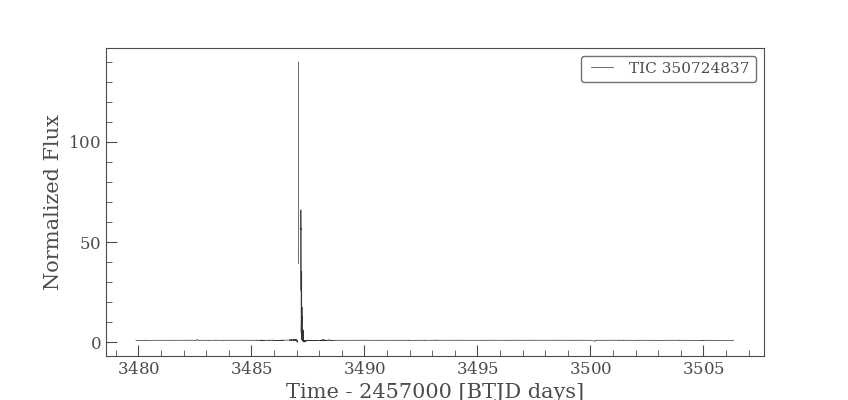

In [4]:
TESS = lk.search_lightcurve('278.5357759 9.5670520', mission='TESS').download_all()
TESS[0].plot()

In [23]:
atlas

,MJD,m,dm,uJy,duJy,F,err,chi/N,RA,Dec,x,y,maj,min,phi,apfit,mag5sig,Sky,Obs
0,57230.361226,13.317,0.004,17110,73,o,0,8392.29,278.53578,9.56705,1398.19,9149.79,3.67,3.59,-55.3,-0.490,18.67,19.84,02a57230o0151o
1,57230.374178,13.338,0.005,16788,78,o,0,6340.10,278.53578,9.56705,1400.05,9154.74,3.68,3.60,-59.7,-0.479,18.68,19.84,02a57230o0165o
2,57230.414690,13.255,0.004,18121,78,o,0,7884.91,278.53578,9.56705,7376.06,896.69,3.67,3.56,7.5,-0.511,18.70,19.86,02a57230o0212o
3,57230.424561,13.281,0.005,17679,83,o,0,6469.74,278.53578,9.56705,7371.06,898.89,3.72,3.62,1.6,-0.508,18.64,19.74,02a57230o0224o
4,57248.312403,13.786,0.004,11105,48,c,0,9140.70,278.53578,9.56705,1146.38,9367.48,4.05,3.88,-58.0,-0.455,19.58,21.66,02a57248o0105c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4085,60629.226243,13.528,0.005,14083,74,o,0,2536.79,278.53578,9.56705,2744.20,9766.29,3.06,2.69,-52.3,-0.414,17.96,18.43,02a60629o0089o
4086,60629.231335,13.590,0.006,13307,79,o,0,876.89,278.53578,9.56705,2801.66,9844.83,2.94,2.57,-48.6,-0.414,17.95,18.39,02a60629o0100o
4087,60630.191860,13.465,0.005,14927,72,o,0,95.80,278.53578,9.56705,7864.93,2691.22,2.55,2.46,78.5,-0.445,18.06,18.07,01a60630o0025o
4088,60630.195083,13.452,0.004,15101,55,o,0,269.94,278.53578,9.56705,7884.98,2728.01,2.61,2.49,89.0,-0.440,18.27,18.45,01a60630o0032o


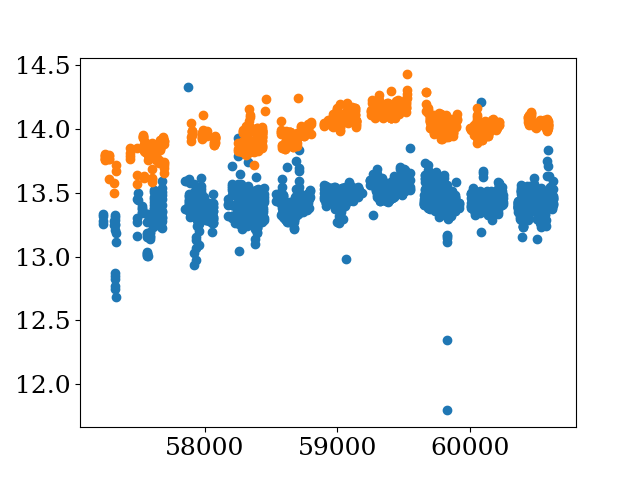

In [27]:
# ATLAS
atlas = pd.read_table('data/atlas_job1892282.txt', delim_whitespace=True)

ao = (atlas['F'] == 'o') & (atlas['dm'] < 0.05) & (atlas['m'] > 10)
ac = (atlas['F'] == 'c') & (atlas['dm'] < 0.05)  & (atlas['m'] > 10)

plt.figure()
plt.scatter(atlas['MJD'][ao], atlas['m'][ao]) 
plt.scatter(atlas['MJD'][ac], atlas['m'][ac])

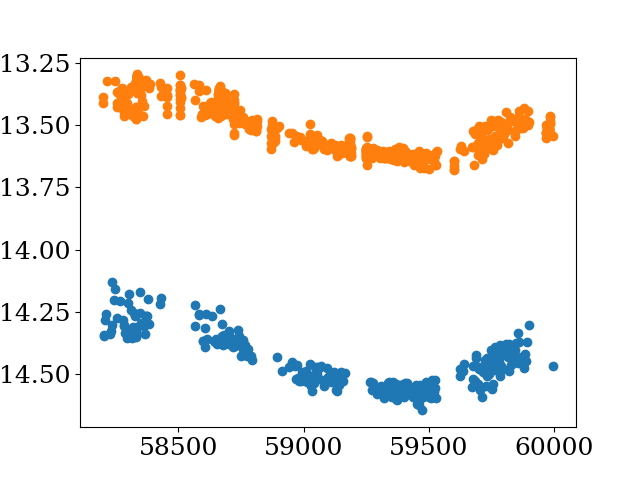

In [18]:
# ZTF
# from: https://ztf.snad.space/dr17/view/538202200014358
# need new ZTF data for more recent events (e.g. from Alert)
ztf = pd.read_csv('data/ZTF17_538202200014358.csv')

zr = ztf['filter'] == 'zr'
zg = ztf['filter'] == 'zg'

plt.figure()
plt.scatter(ztf['mjd'][zg], ztf['mag'][zg])
plt.scatter(ztf['mjd'][zr], ztf['mag'][zr])
plt.gca().invert_yaxis()

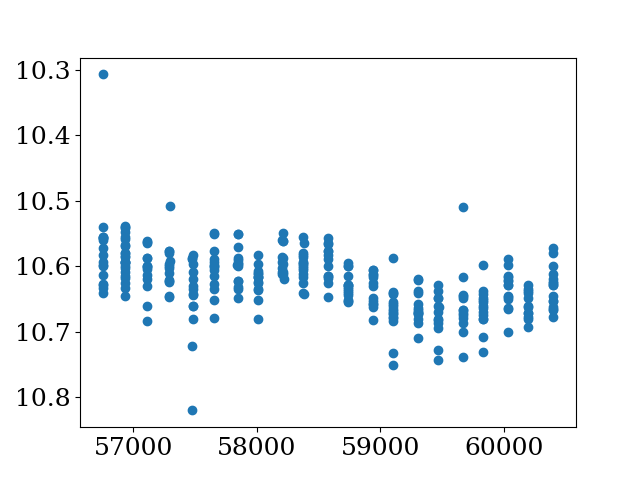

In [17]:
# WISE
wise = pd.read_csv('data/278.5357759 9.567052neowiser_p1bs_psd.csv')
plt.figure()
plt.scatter(wise['mjd'], wise['w1mpro'])
plt.gca().invert_yaxis()

/var/folders/8t/yh7p62792_b_y17g3f6wk0wm0000gn/T/ipykernel_73745/3342350848.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


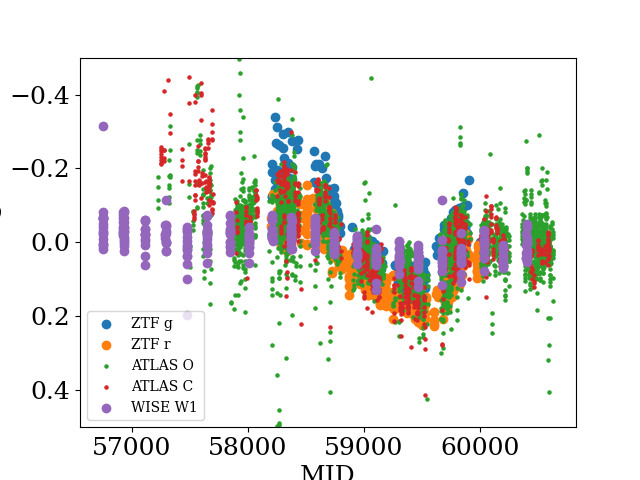

In [34]:
# combined...
plt.figure()

plt.scatter(ztf['mjd'][zg], ztf['mag'][zg] - np.nanmedian(ztf['mag'][zg]), label='ZTF g')
plt.scatter(ztf['mjd'][zr], ztf['mag'][zr] - np.nanmedian(ztf['mag'][zr]), label='ZTF r')

plt.scatter(atlas['MJD'][ao], atlas['m'][ao] - np.nanmedian(atlas['m'][ao]),s=5, label='ATLAS O') 
plt.scatter(atlas['MJD'][ac], atlas['m'][ac] - np.nanmedian(atlas['m'][ac]),s=5, label='ATLAS C')

plt.scatter(wise['mjd'], wise['w1mpro'] - np.nanmedian(wise['w1mpro']), label='WISE W1')

plt.ylim(0.5,-0.5)
            
plt.legend(fontsize=10)
plt.ylabel('$\Delta$ Mag')
plt.xlabel('MJD')
plt.savefig('combined_LC.png', dpi=150, bbox_inches='tight', pad_inches=0.25)